In [11]:
## Binder/local setup (safe and portable)
from pathlib import Path
import os
import sys

import pandas as pd

# Optional on Binder/local if dependencies are missing:
# %pip install -q -r requirements.txt

# Make project importable in either layout:
# 1) package layout (.../parent/pynat/*.py)
# 2) flat layout (.../repo_root/helpers.py)
cwd = Path.cwd().resolve()
search_paths = [cwd, *cwd.parents]
for p in search_paths:
    p_str = str(p)
    if p_str not in sys.path:
        sys.path.insert(0, p_str)

try:
    from pynat import helpers
    import_mode = "package: pynat.helpers"
except ModuleNotFoundError:
    import helpers
    import_mode = "module: helpers"

pd.options.display.max_rows = 250
print(f"Working dir: {cwd}")
print(f"Import mode: {import_mode}")
print(f"INAT token set: {bool(os.getenv('INAT_TOKEN'))}")

Working dir: C:\Users\drsvs\Desktop\code\pynat
Import mode: package: pynat.helpers
INAT token set: False


In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### `coming_soon()` quick guide (Binder-ready defaults)

Use this notebook to ask: *what is likely active near me in the next few days?*

- **`kind`**: which group/phenotype to query
  - `any`: all taxa
  - `plants`: Plantae
  - `flowers`: observations tagged with flowering phenotype
  - `fruits` (or `fruit`): observations tagged with fruiting phenotype
  - `mushrooms`: fungi scoped to common mushroom taxon filter
  - `animals`: Animalia
  - `wugs`: invertebrate-focused (`animals` minus vertebrates)
  - `fish`, `herps`, `birds`, `mammals`: common clade presets
  - `butterflies`, `caterpillars`: Lepidoptera filtered by life stage

- **`norm`**: how to rank taxa
  - `None`: raw local counts
  - `time`: normalize by counts for this place (across time)
  - `place`: normalize by counts for this time window (across places)
  - `overall`: normalize by overall counts (broad baseline)

- **`lineage_filter`**: nativity-based filtering
  - `any`: no nativity filtering (default)
  - `native_endemic`: keep only native/endemic taxa
  - `introduced`: keep only introduced taxa

- **`nativity_place_id`**: region used for nativity labels/filtering
  - `"auto"` (recommended): derive region from current `place_id` or `target_loc`
  - integer place id (e.g., `1297` for Virginia): force a specific region
  - `None`: global nativity inference

- **Bandwidth controls**
  - Date window is fixed to a wider seasonal range (about -6 to +7 days)
  - `per_page=25`, `max_pages=2`: lower API load, fewer timeouts
  - `fetch_images=False`: fastest path; set `True` when you want photos
  - `use_cache=True`: reuses responses when available

- **Token note**
  - Works anonymously, but may be rate-limited.
  - For higher limits, set environment variable `INAT_TOKEN` in your session.

In [15]:
# --- Query configuration (Binder-safe defaults) ---

# Where to search: (latitude, longitude, radius_km)
target_loc = (37.66933, -77.81001, 42)

# What to search for (see markdown cell above for full list)
kind = "flowers"

# Number of taxa rows to return
limit = 7

# Ranking mode: None | "time" | "place" | "overall"
norm = "time"

# Optional nativity lineage filter: "any" | "native_endemic" | "introduced"
lineage_filter = "native_endemic"

# Region used for nativity labels/filtering: "auto" | int place id | None
nativity_place_id = "auto"

# Bandwidth settings
per_page = 25
max_pages = 2
use_cache = True

# Images are slower; set True when you want visual output
fetch_images = True

<IPython.core.display.HTML object>

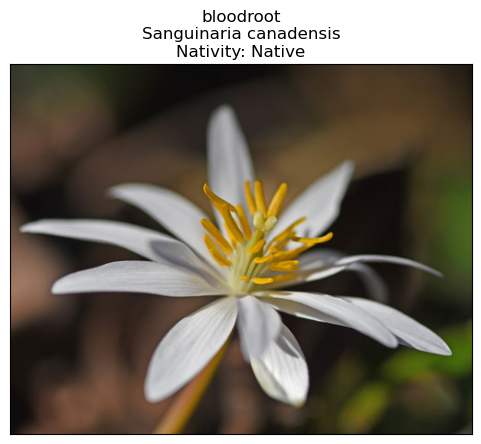

<IPython.core.display.HTML object>

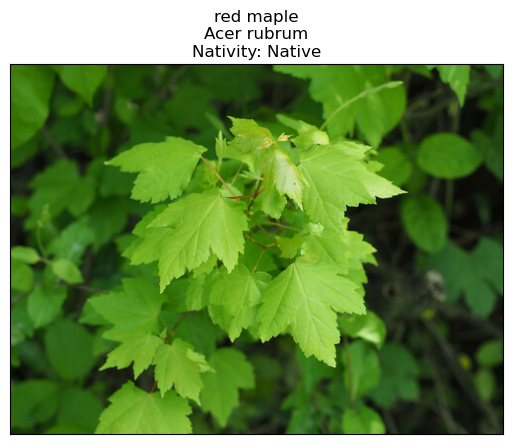

<IPython.core.display.HTML object>

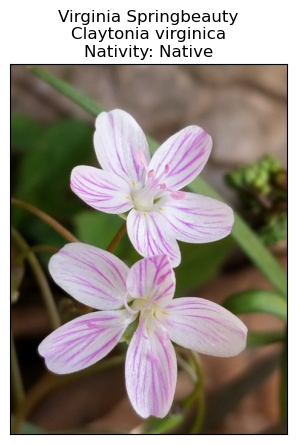

<IPython.core.display.HTML object>

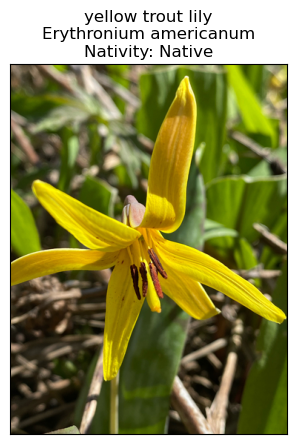

<IPython.core.display.HTML object>

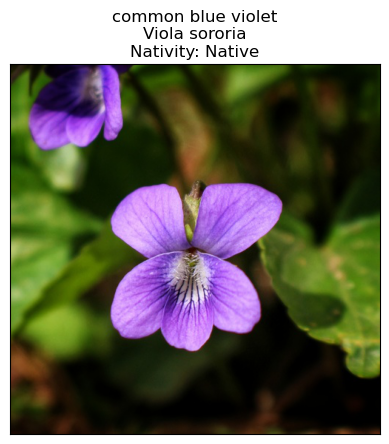

<IPython.core.display.HTML object>

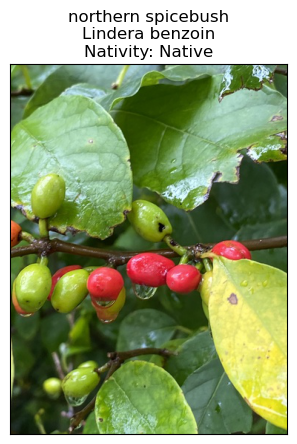

<IPython.core.display.HTML object>

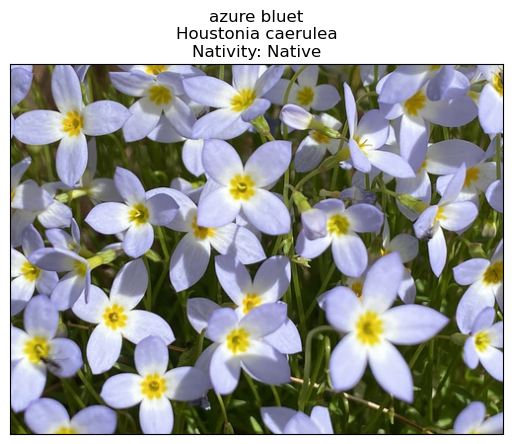

,count,taxon.name,taxon.preferred_common_name,taxon.wikipedia_url
6,8,Sanguinaria canadensis,bloodroot,https://en.wikipedia.org/wiki/Sanguinaria
2,16,Acer rubrum,red maple,http://en.wikipedia.org/wiki/Acer_rubrum
23,7,Claytonia virginica,Virginia Springbeauty,https://en.wikipedia.org/wiki/Claytonia_virginica
3,3,Erythronium americanum,yellow trout lily,http://en.wikipedia.org/wiki/Erythronium_ameri...
21,8,Viola sororia,common blue violet,http://en.wikipedia.org/wiki/Viola_sororia
10,5,Lindera benzoin,northern spicebush,http://en.wikipedia.org/wiki/Lindera_benzoin
20,1,Houstonia caerulea,azure bluet,http://en.wikipedia.org/wiki/Houstonia_caerulea


In [16]:
# Run query
res = helpers.coming_soon(
    kind=kind,
    loc=target_loc,
    norm=norm,
    limit=limit,
    per_page=per_page,
    max_pages=max_pages,
    fetch_images=fetch_images,
    use_cache=use_cache,
    lineage_filter=lineage_filter,
    nativity_place_id=nativity_place_id,
 )

# Show compact results table
res[["count", "taxon.name", "taxon.preferred_common_name", "taxon.wikipedia_url"]].head(limit)